# PyCon Workshop

[Click here to run this notebook on Colab](https://colab.research.google.com/github/AllenDowney/PoliticalAlignmentCaseStudy/blob/main/workshop/TODO.ipynb).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Install empiricaldist if we don't already have it

try:
    import empiricaldist
except ImportError:
    !pip install empiricaldist

In [3]:
# download utils.py

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
        
download("https://github.com/AllenDowney/ProbablyOverthinkingIt/raw/book/notebooks/utils.py")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import decorate

# Set the random seed so we get the same results every time
np.random.seed(17)

plt.rcParams["figure.figsize"] = 7, 3.5
plt.rcParams["figure.dpi"] = 75
plt.rcParams["axes.titlelocation"] = "left"
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.bottom"] = False
plt.rcParams["axes.spines.left"] = False
plt.rcParams["axes.spines.right"] = False

## Old Optimists, Young Pessimists

Would you say that most of the time people try to be helpful, or that they are mostly just looking out for themselves? Almost every year since 1972, the General Social Survey (GSS) has posed that question to a representative sample of adult residents of the United States.

The following figure shows how the responses have changed over time.
The circles show the percentage of people in each survey who said that people try to be helpful.

In [5]:
# This dataset is prepared in the GssExtract repository

DATA_PATH = "https://github.com/AllenDowney/GssExtract/raw/main/data/interim/"

filename = "gss_extract_pacs_workshop.hdf"
download(DATA_PATH + filename)

In [6]:
gss = pd.read_hdf(filename, "gss")
gss.shape

(72390, 29)

In [7]:
gss.head()

,age,attend,ballot,class,cohort,degree,educ,fair,fear,goodlife,...,region,relig,rincome,satfin,satjob,sex,srcbelt,trust,wtssall,year
0,24.0,1.0,NaN,3.0,1948.0,3.0,16.0,2.0,NaN,NaN,...,1,1.0,NaN,1.0,NaN,1.0,5.0,1.0,1.3339,1972
1,33.0,2.0,NaN,2.0,1939.0,0.0,10.0,2.0,NaN,NaN,...,1,2.0,NaN,3.0,2.0,1.0,1.0,1.0,0.8893,1972
2,40.0,8.0,NaN,2.0,1932.0,1.0,12.0,2.0,NaN,NaN,...,1,5.0,NaN,1.0,NaN,2.0,3.0,2.0,1.3339,1972
3,24.0,2.0,NaN,2.0,1948.0,1.0,12.0,1.0,NaN,NaN,...,9,2.0,NaN,2.0,NaN,1.0,3.0,2.0,1.7786,1972
4,21.0,7.0,NaN,3.0,1951.0,1.0,12.0,1.0,NaN,NaN,...,9,1.0,NaN,1.0,NaN,2.0,2.0,NaN,1.7786,1972



https://gssdataexplorer.norc.org/variables/439/vshow

"Would you say that most of the time people try to be helpful, or that they are mostly just looking out for themselves?"

```
1: Helpful
2: Look out for themselves
3: Depends
```

In [8]:
question = """Would you say that most of the time people try to be helpful, 
or that they are mostly just looking out for themselves?
"""

responses = ['Helpful', 'Look out\nfor themselves', 'Depends']

ylabel = "Percent saying 'helpful'"

In [9]:
column = gss['helpful']
column

0        2.0
1        1.0
2        2.0
3        2.0
4        2.0
        ... 
72385    2.0
72386    1.0
72387    NaN
72388    NaN
72389    1.0
Name: helpful, Length: 72390, dtype: float64

In [10]:
column.value_counts()

helpful
1.0    20471
2.0    18972
3.0     2971
Name: count, dtype: int64

In [11]:
def value_counts(seq, **options):
    """Make a series of values and the number of times they appear.

    Args:
        seq: sequence

    returns: Pandas Series
    """
    return pd.Series(seq).value_counts(**options).sort_index()

In [12]:
value_counts(column)

helpful
1.0    20471
2.0    18972
3.0     2971
Name: count, dtype: int64

In [13]:
value_counts(column, dropna=False)

helpful
1.0    20471
2.0    18972
3.0     2971
NaN    29976
Name: count, dtype: int64

In [14]:
pmf = value_counts(column, normalize=True)
pmf

helpful
1.0    0.482647
2.0    0.447305
3.0    0.070048
Name: proportion, dtype: float64

In [15]:
from empiricaldist import Pmf

pmf = Pmf.from_seq(column)
pmf

,probs
helpful,
1.0,0.482647
2.0,0.447305
3.0,0.070048


In [16]:
def decorate(**options):
    """Decorate the current axes.

    Call decorate with keyword arguments like
    decorate(title='Title',
             xlabel='x',
             ylabel='y')

    The keyword arguments can be any of the axis properties
    https://matplotlib.org/api/axes_api.html
    """
    legend = options.pop("legend", True)
    loc = options.pop("loc", "best")

    # Pass options to Axis.set
    ax = plt.gca()
    ax.set(**options)

    # Add a legend if there are any labeled elements
    handles, labels = ax.get_legend_handles_labels()
    if handles and legend:
        ax.legend(handles, labels, loc=loc)

    # Tight layout is generally a good idea
    plt.tight_layout()

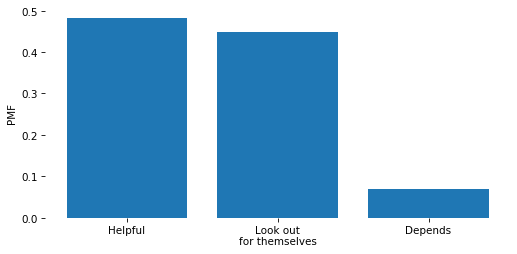

In [17]:
pmf.bar()
plt.xticks([1, 2, 3], responses)

decorate(ylabel='PMF')

## Time Series

In [18]:
gss72 = gss.query('year == 1972')
gss72.shape

(1613, 29)

In [19]:
pmf72 = Pmf.from_seq(gss72['helpful'])
pmf72

,probs
helpful,
1.0,0.467549
2.0,0.473220
3.0,0.059231


In [20]:
xtab = pd.crosstab(gss["year"], gss["helpful"], normalize='index')
xtab.head()

helpful,1.0,2.0,3.0
year,,,
1972,0.467549,0.473220,0.059231
1973,0.478581,0.492637,0.028782
1975,0.589588,0.354293,0.056119
1976,0.435278,0.499665,0.065057
1978,0.592252,0.353907,0.053841


In [21]:
time_series = xtab[1] * 100
time_series.name = "data"

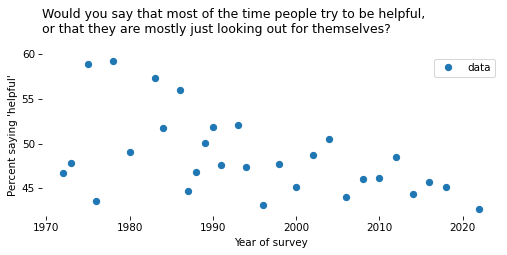

In [22]:
time_series.plot(style='o')
decorate(
    xlabel="Year of survey",
    ylabel=ylabel,
    title=question,
)

In [23]:
from statsmodels.nonparametric.smoothers_lowess import lowess


def make_lowess(series, frac=0.5):
    """Use LOWESS to compute a smooth line.

    series: pd.Series

    returns: pd.Series
    """
    y = series.to_numpy()
    x = series.index.to_numpy()

    smooth = lowess(y, x, frac)
    index, data = np.transpose(smooth)

    return pd.Series(data, index=index)

In [24]:
smooth = make_lowess(time_series)

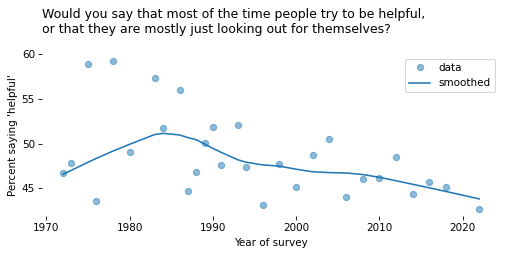

In [25]:
time_series.plot(style='o', alpha=0.5)
smooth.plot(label='smoothed', color='C0')

decorate(
    xlabel="Year of survey",
    ylabel=ylabel,
    title=question,
)

In [26]:
# tempting but wrong

gss['y'] = gss['helpful'] == 1
value_counts(gss['y'])

y
False    51919
True     20471
Name: count, dtype: int64

In [27]:
gss['y'] = np.where(gss['helpful'].notna(), gss['helpful'] == 1, np.nan)
value_counts(gss['y'], dropna=False)

y
0.0    21943
1.0    20471
NaN    29976
Name: count, dtype: int64

In [28]:
gss['y'] = gss['helpful'].replace([1, 2, 3], [1, 0, 0])
value_counts(gss['y'], dropna=False)

y
0.0    21943
1.0    20471
NaN    29976
Name: count, dtype: int64

## Pivot tables

In [29]:
polviews_map = {
    1: 'Liberal',
    2: 'Liberal',
    3: 'Liberal',
    4: 'Moderate',
    5: 'Conservative',
    6: 'Conservative',
    7: 'Conservative',
}

In [30]:
gss['polviews3'] = gss['polviews'].replace(polviews_map)

In [31]:
value_counts(gss['polviews3'])

polviews3
Conservative    21580
Liberal         17370
Moderate        23912
Name: count, dtype: int64

In [32]:
table = gss.pivot_table(
    index='year', columns='polviews3', values='y', aggfunc='mean'
)
table.head()

polviews3,Conservative,Liberal,Moderate
year,,,
1975,0.653759,0.604762,0.557621
1976,0.451346,0.423398,0.454386
1978,0.666667,0.542453,0.583187
1980,0.528827,0.448485,0.497521
1983,0.584362,0.531915,0.574603


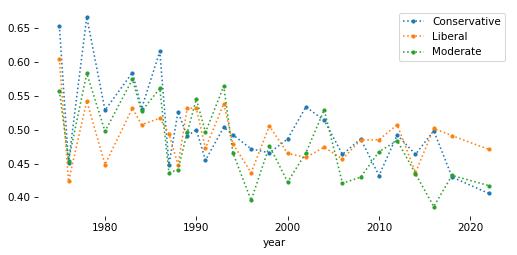

In [33]:
table.plot(style='.:')
decorate()

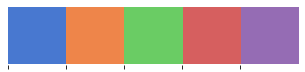

In [34]:
muted = sns.color_palette('muted', 5)
sns.palplot(muted)

In [35]:
color_map = {
    'Conservative': muted[3], 
    'Moderate': muted[4], 
    'Liberal': muted[0]
}

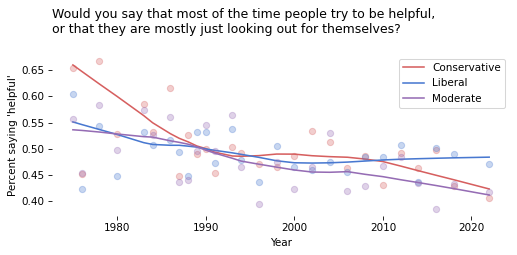

In [36]:
groups = ['Conservative', 'Liberal', 'Moderate']

for group in groups:
    series = table[group]
    color = color_map[group]
    series.plot(style='o', label='', color=color, alpha=0.3)
    smooth = make_lowess(series)
    smooth.plot(label=group, color=color)

decorate(
    xlabel='Year',
    ylabel=ylabel,
    title=question,
)

## Group by

Now that we have `y` as a binary variable, we have another way to compute the time series.

In [37]:
valid = gss.dropna(subset=['y'])

In [38]:
time_series2 = valid.groupby('year')['y'].mean() * 100
np.allclose(time_series, time_series2)

True

And the pivot table

In [39]:
table2 = valid.groupby(['year', 'polviews3'])['y'].mean().unstack() * 100
np.allclose(table, table2)

False

There are pros and cons of each method.

## Logistic regression

In [40]:
year_shift = gss['year'].median()
gss['x'] = gss['year'] - year_shift

In [43]:
valid_year = gss.dropna(subset=['y', 'x'])

In [45]:
import statsmodels.formula.api as smf

formula = 'y ~ x + I(x**2)'

model = smf.logit(formula, data=valid_year).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.691405
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                42414
Model:                          Logit   Df Residuals:                    42411
Method:                           MLE   Df Model:                            2
Date:                Wed, 23 Apr 2025   Pseudo R-squ.:                0.001646
Time:                        21:05:26   Log-Likelihood:                -29325.
converged:                       True   LL-Null:                       -29374.
Covariance Type:            nonrobust   LLR p-value:                 9.969e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0823      0.014     -5.778      0.000      -0.110      -0.054
x             -0.0067      0.001     -9.587      0.000      -0.008      -0.005
I(x ** 2)  -3.607e-05   4.95e-05     -0.728      0.467      -0.000     6.1e-05
==============================================================================
"""

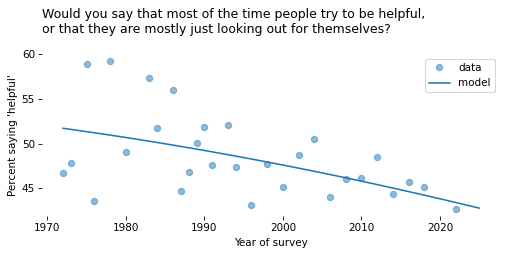

In [46]:
year_range = np.arange(1972, 2026)

pred_df = pd.DataFrame(dict(x=year_range - year_shift))

pred = model.predict(pred_df) * 100
pred.index = year_range

time_series.plot(style='o', alpha=0.5)
pred.plot(label='model', color='C0')

decorate(
    xlabel="Year of survey",
    ylabel=ylabel,
    title=question,
)

In [47]:
def fit_model(data, x_range, x_shift):
    formula = 'y ~ x + I(x**2)'
    model = smf.logit(formula, data=data).fit(disp=False)
    
    pred_df = pd.DataFrame(dict(x=x_range - x_shift))
    pred = model.predict(pred_df) * 100
    pred.index = x_range
    pred.name = 'model'

    return pred

In [48]:
pred2 = fit_model(valid_year, year_range, year_shift)
np.allclose(pred, pred2)

True

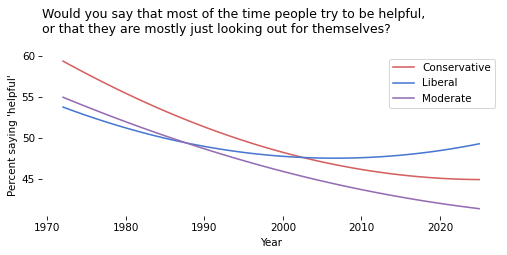

In [50]:
for name, group in valid_year.groupby('polviews3'):
    pred = fit_model(group, year_range, year_shift)
    pred.plot(label=name, color=color_map[name])
    
decorate(
    xlabel='Year',
    ylabel=ylabel,
    title=question,
)

## Group by year of birth

In [51]:
gss["cohort"] = gss["cohort"].replace(9999, np.nan)
gss["cohort"].describe()

count    71635.000000
mean      1952.562853
std         21.977789
min       1883.000000
25%       1938.000000
50%       1954.000000
75%       1967.000000
max       2004.000000
Name: cohort, dtype: float64

In [52]:
cohort_shift = gss['cohort'].median()

In [53]:
gss['x'] = gss['cohort'] - cohort_shift

In [54]:
valid_cohort = gss.dropna(subset=['y', 'x'])

In [55]:
series_cohort = valid_cohort.groupby('cohort')['y'].mean() * 100
series_cohort.name = 'data'

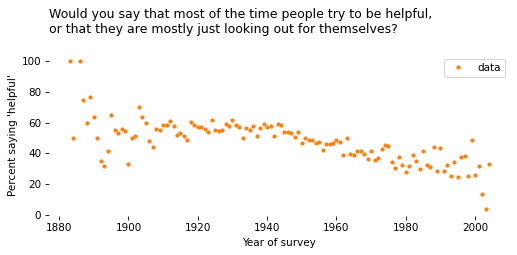

In [56]:
series_cohort.plot(style='.', color='C1')

decorate(
    xlabel="Year of survey",
    ylabel=ylabel,
    title=question,
)

In [57]:
cohort_range = np.arange(1880, 2010)

pred = fit_model(valid_cohort, cohort_range, cohort_shift)

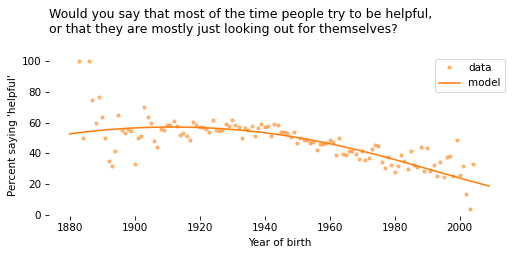

In [58]:
series_cohort.plot(style='.', color='C1', alpha=0.5)
pred.plot(color='C1')

decorate(
    xlabel="Year of birth",
    ylabel=ylabel,
    title=question,
)

## Just one cohort

In [59]:
gss['x'] = gss['year'] - year_shift

In [60]:
from utils import round_into_bins

gss["cohort10"] = round_into_bins(gss["cohort"], 10, 1880)
value_counts(gss["cohort10"])

cohort10
1880.0       45
1890.0      501
1900.0     1722
1910.0     3616
1920.0     5862
1930.0     7115
1940.0    10925
1950.0    14273
1960.0    11699
1970.0     7681
1980.0     5088
1990.0     2563
2000.0      545
2010.0      755
Name: count, dtype: int64

In [61]:
cohort_df = gss.query("cohort10 == 1940")
cohort_df.shape

(10925, 33)

In [62]:
series_cohort40 = cohort_df.groupby('year')['y'].mean() * 100
series_cohort40.name = '1940 cohort'

In [63]:
valid_cohort40 = cohort_df.dropna(subset=['y', 'x'])
valid_cohort40.shape

(6791, 33)

In [64]:
pred = fit_model(valid_cohort40, year_range, year_shift)

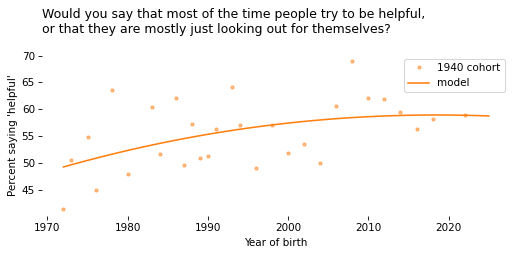

In [65]:
series_cohort40.plot(style='.', color='C1', alpha=0.5)
pred.plot(color='C1')

decorate(
    xlabel="Year of birth",
    ylabel=ylabel,
    title=question,
)

## All the Cohorts

In [66]:
def plot_cohort(df, cohort, color='C0'):
    cohort_df = df.query("cohort10 == @cohort")

    series_cohort = cohort_df.groupby('year')['y'].mean() * 100

    valid_cohort = cohort_df.dropna(subset=['y', 'x'])

    year = valid_cohort['year']
    year_range = np.arange(year.min(), year.max()+1)
    year_shift = year.median()

    pred = fit_model(valid_cohort, year_range, year_shift)
    x, y = pred.index[-1], pred.values[-1]
    plt.text(x, y, cohort, ha='left', va='center')

    pred.plot(label=cohort, color=color)

In [67]:
first, last = 1920, 2000
subset = gss.query("@first <= cohort <= @last" )
subset.shape

(65390, 33)

In [68]:
pred = fit_model(subset, year_range, year_shift)

In [69]:
cohorts = np.sort(subset['cohort10'].unique().astype(int))
cohorts

array([1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000])

In [70]:
cmap = plt.get_cmap('Purples')

colors = [cmap(x) for x in np.linspace(0.3, 0.9, len(cohorts))]

In [71]:
def anchor_legend(x, y):
    """Place the upper left corner of the legend box.

    x: x coordinate
    y: y coordinate
    """
    plt.legend(bbox_to_anchor=(x, y), loc="upper left")
    plt.tight_layout()

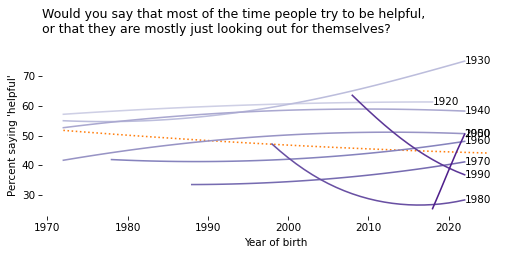

In [72]:
pred.plot(ls=':', color='C1')

for cohort, color in zip(cohorts, colors):
    plot_cohort(gss, cohort, color)
    
decorate(
    xlabel="Year of birth",
    ylabel=ylabel,
    title=question,
    legend=False
)

## Simpson's Paradox

And the composition of the population has changed a lot over 50 years.
The following figure shows the distribution of birth years for the respondents at the beginning of the survey in 1973, near the middle in 1990, and most recently in 2018.

In [75]:
xtab_cohort = pd.crosstab(gss["cohort10"], gss["year"], normalize="columns")
xtab_cohort.head()

year,1972,1973,1974,1975,1976,1977,1978,1980,1982,1983,...,2004,2006,2008,2010,2012,2014,2016,2018,2021,2022
cohort10,,,,,,,,,,,,,,,,,,,,,
1880.0,0.003100,0.003989,0.008086,0.006711,0.004670,0.000000,0.003264,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1890.0,0.047737,0.038564,0.029650,0.036913,0.047365,0.027451,0.028721,0.017030,0.018817,0.005003,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1900.0,0.109733,0.099069,0.129380,0.081879,0.070047,0.090850,0.082898,0.059264,0.051075,0.038149,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1910.0,0.151891,0.158245,0.130728,0.130201,0.144096,0.124837,0.105091,0.123978,0.103226,0.093183,...,0.015647,0.007539,0.007909,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1920.0,0.223807,0.180186,0.192722,0.186577,0.158773,0.183660,0.152089,0.160082,0.148387,0.136961,...,0.038762,0.039911,0.038062,0.035225,0.025329,0.014184,0.009766,0.008518,0.0,0.0


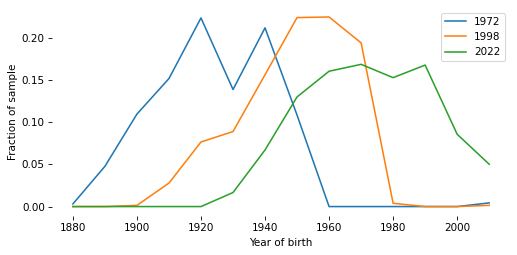

In [74]:
xtab_cohort[1972].plot(label="1972")
xtab_cohort[1998].plot(label="1998")
xtab_cohort[2022].plot(label="2022")

decorate(xlabel="Year of birth", ylabel="Fraction of sample")

Probably Overthinking It

Copyright 2022 Allen Downey 

The code in this notebook and `utils.py` is under the [MIT license](https://mit-license.org/).